In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Accident_Data_onehot_encoded.csv')

In [ ]:
df.shape

(635704, 26)

In [ ]:
df.head()

,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Month,Year,Light_Conditions_Darkness,Light_Conditions_Daylight,Road_Surface_Conditions_Dry,...,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Raining,Weather_Conditions_Snowing/Fog_or_mist,Vehicle_Type_Agricultural_or_Other_heavy_vehicle,Vehicle_Type_Car,Vehicle_Type_Goods_Carrier,Vehicle_Type_Motorcycle,Vehicle_Type_Passenger_Vehicles(Minibus_or_Bus)
0,0,51.506187,-0.209082,1,2,6,2019,True,False,True,...,False,True,True,False,False,False,True,False,False,False
1,0,51.495029,-0.173647,1,2,7,2019,False,True,False,...,False,True,False,True,False,False,True,False,False,False
2,0,51.495478,-0.202731,1,4,8,2019,False,True,True,...,False,True,True,False,False,False,False,False,False,True
3,0,51.497750,-0.192556,2,3,9,2019,False,True,True,...,False,True,True,False,False,False,True,False,False,False
4,0,51.501405,-0.161577,1,2,9,2019,False,True,True,...,False,True,True,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635704 entries, 0 to 635703
Data columns (total 26 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Accident_Severity                                 635704 non-null  int64  
 1   Latitude                                          635704 non-null  float64
 2   Longitude                                         635704 non-null  float64
 3   Number_of_Casualties                              635704 non-null  int64  
 4   Number_of_Vehicles                                635704 non-null  int64  
 5   Month                                             635704 non-null  int64  
 6   Year                                              635704 non-null  int64  
 7   Light_Conditions_Darkness                         635704 non-null  bool   
 8   Light_Conditions_Daylight                         635704 non-null  bool   
 9   Road

Without Sampling(smote/Random)

In [ ]:
target = 'Accident_Severity'

Test/Train Split

In [ ]:
Y = df[target].copy()
X = df.drop(columns=[target]).copy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=200)

Accident_Severity
1    541326
0     94378
Name: count, dtype: int64


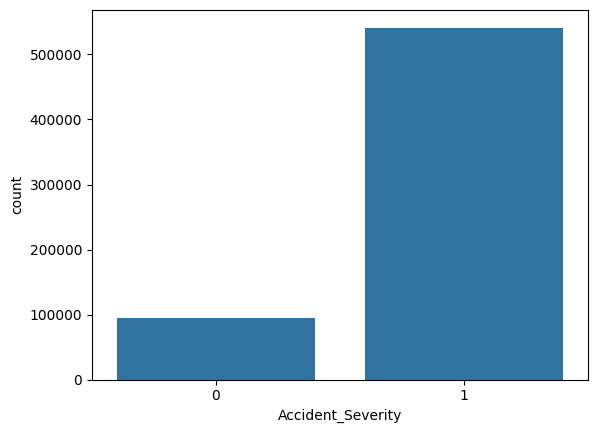

In [ ]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [ ]:
print('Slight',100* (540712/float(df.shape[0])))
print('Fatal',100* (94309/float(df.shape[0])))

Slight 85.05719643104338
Fatal 14.835363628355335



Scaling of the X_train and X_test(independent variables) with fit_transform and transform methods respectively, we do not use fit method for test data as it introduces bias if used.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [ ]:
clf = LogisticRegression(solver='saga').fit(X_train, Y_train)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8523585301396871
Precision =  0.852673182099705
Recall =  0.9994585981383158
F1 Score =  0.9202493605957011


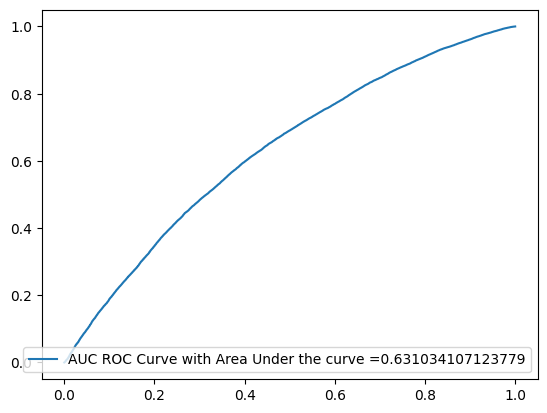

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 0.5, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model
grid_result = grid_search.fit(X_train, Y_train)

In [ ]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1'}
Best Score: 0.8512355277090554


In [ ]:
grid_opt = LogisticRegression(C=0.5, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=0.1, verbose=0, warm_start=False).fit(X_train, Y_train)

In [ ]:
Y_Test_Pred = grid_opt.predict(X_test)

In [ ]:
y_pred_grid_opt = grid_opt.predict(X_test)
print(classification_report(Y_Test_Pred, Y_test))

              precision    recall  f1-score   support

           0       0.00      0.53      0.01       162
           1       1.00      0.85      0.92    190550

    accuracy                           0.85    190712
   macro avg       0.50      0.69      0.46    190712
weighted avg       1.00      0.85      0.92    190712



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,y_pred_grid_opt)
print(cm)

[[    86  28085]
 [    76 162465]]


In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_Test_Pred, Y_test)

0.6917375304106697

**With Sampling using SMOTE techmique**

1.   List item
2.   List item



---



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=200, sampling_strategy= 0.6)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 227271, 1: 378785}

In [ ]:
clf = LogisticRegression(solver='saga').fit(x_train_res, y_train_res)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.7270019715592096
Precision =  0.8796643137470531
Recall =  0.787401332586855
F1 Score =  0.8309796970464299


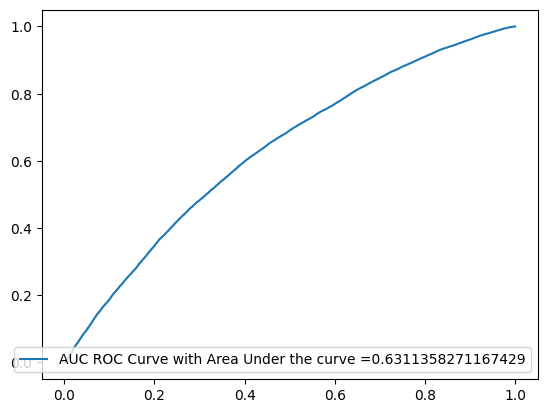

In [ ]:
generate_auc_roc_curve(clf, X_test)

Optimizing using grid search method for best parameters

In [ ]:
# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 0.5, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model
grid_result = grid_search.fit(x_train_res, y_train_res)

In [ ]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1'}
Best Score: 0.6420165768772743


In [ ]:
opt_clf = LogisticRegression(solver='saga',C=100, penalty ='l1').fit(x_train_res, y_train_res)

In [ ]:
opt_Y_Test_Pred = opt_clf.predict(X_test)

In [ ]:
generate_model_report(Y_test, opt_Y_Test_Pred)

Accuracy =  0.8091205587482696
Precision =  0.8672054217077914
Recall =  0.9163595646636848
F1 Score =  0.8911051616087587


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,opt_Y_Test_Pred)
print(cm)

In [ ]:
print(classification_report(opt_Y_Test_Pred, Y_test))

              precision    recall  f1-score   support

           0       0.19      0.28      0.23     18958
           1       0.92      0.87      0.89    171754

    accuracy                           0.81    190712
   macro avg       0.55      0.58      0.56    190712
weighted avg       0.84      0.81      0.83    190712

